## Notas - Curso de Análise de Dados - DIO

Além das estruturas de dados nativas do Python, podemos realizar nossas análises a partir de outras fontes de dados, tais como arquivos csv, planilhas excel e outras estruturas tabulares ou não. 

Para introduzir a este assunto, iremos utilizar uma biblioteca largamente utilizada durante a análise de dados com Python, a biblioteca Pandas.

In [1]:
import pandas as pd

# carregando um arquivo csv
df = pd.read_csv('datasets/Gapminder.csv', sep = ';')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


Após carregado os dados. 

Para uma melhor visualização, iremos realizar uma mudança nos nomes das colunas, a partir da função rename:

In [2]:
df = df.rename(columns={"country":"Pais", 
                        "continent": "continente", 
                        "year":"Ano", 
                        "lifeExp":"Expectativa de vida", 
                        "pop":"Pop Total", 
                        "gdpPercap": "PIB"})
df.head(10)

,Pais,continente,Ano,Expectativa de vida,Pop Total,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


Outras informações que podem ser importantes durante nossas análises, e que podem ser obtidas facilmente a partir de funções Python, são: 

- informações sobre a quantidade de dados que iremos analisar (quantidade de linhas e colunas do banco de dados), a partir da função: `df.shape` 
- informações sobre as variáveis que serão estudadas,  a partir da função: `df.columns`
- informações sobre os tipo de dados que iremos analisar, a partir da função: `df.dtypes`
- algumas informações referentes as principais estatísticas descritivas, a partir da função:    `df.describe()`

In [3]:
df.shape

(3312, 6)

In [4]:
df.columns

Index(['Pais', 'continente', 'Ano', 'Expectativa de vida', 'Pop Total', 'PIB'], dtype='object')

In [5]:
df.dtypes

Pais                    object
continente              object
Ano                      int64
Expectativa de vida    float64
Pop Total                int64
PIB                    float64
dtype: object

In [6]:
df.describe()

,Ano,Expectativa de vida,Pop Total,PIB
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165876
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


Além das informações gerais do banco de dados, podemos direcionar nossa pesquisa a uma variável em específico, por exemplo a variável continente, de modo a entendê-la melhor e poder realizar estudos agrupando ou segmentando nossos dados a partir de seus valores.

Para obter os valores únicos dessa variável, por exemplo, podemos usar a função `unique()`

In [7]:
df["continente"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', nan, 'FSU', 'Oceania'],
      dtype=object)

Podemos então utilizar a função `loc` filtrar um valor específico de uma variável, assim como podemos observar abaixo:

In [8]:
Oceania = df.loc[df["continente"] == "Oceania"]
Oceania.head()

,Pais,continente,Ano,Expectativa de vida,Pop Total,PIB
975,Fiji,Oceania,1962,56.494,421869,2039.393277
976,Fiji,Oceania,1967,58.607,485000,2170.073285
977,Fiji,Oceania,1972,60.642,544000,2797.759484
978,Fiji,Oceania,1977,62.669,599339,3182.569600
979,Fiji,Oceania,1982,64.683,658906,3209.257468


Outra função que se mostra importante durante a análise do banco de dados é a `nunique()`, que permite contar a ocorrência dos valores únicos de uma dada variável:

In [9]:
df.groupby("continente")["Pais"].nunique()

continente
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: Pais, dtype: int64

In [10]:
df.groupby("Ano")["Expectativa de vida"].mean()

Ano
1950    62.002568
1951    65.904167
1952    49.206867
1953    66.674563
1954    67.459817
1955    67.806757
1956    67.950637
1957    51.614590
1958    68.815936
1959    68.226579
1960    68.470837
1961    68.862480
1962    54.035234
1963    69.595735
1964    70.063105
1965    70.259881
1966    70.447526
1967    56.263629
1968    70.689081
1969    70.653896
1970    70.961141
1971    71.103976
1972    58.474481
1973    71.500338
1974    71.778504
1975    71.939218
1976    72.158050
1977    60.429090
1978    72.717567
1979    73.018717
1980    73.064524
1981    73.337399
1982    62.365871
1983    73.787778
1984    74.100741
1985    74.112222
1986    74.452222
1987    63.984860
1988    74.760000
1989    74.924444
1990    74.283438
1991    74.374848
1992    65.008443
1993    74.324545
1994    74.456667
1995    74.552727
1996    75.029394
1997    65.873799
1998    75.569697
1999    75.703636
2000    76.026364
2001    76.257879
2002    66.835695
2003    76.586667
2004    76.921562
2005  

### Trabalhando com arquivos excel

Como dito ateriormente, durante a análise de dados com Python, podemos carregar nossos dados a apartir das mais diversas fontes. Naseção anterior, carregamos dados a partir de um documento csv e nesta iremos realizar o carregamento de dados xlsx (formato excel)

In [11]:
import pandas as pd
#carregando dados sobre as principais capitais do norte/nordeste 
df1 = pd.read_excel("datasets/Aracaju.xlsx")
df2 = pd.read_excel("datasets/Fortaleza.xlsx")
df3 = pd.read_excel("datasets/Natal.xlsx")
df4 = pd.read_excel("datasets/Recife.xlsx")
df5 = pd.read_excel("datasets/Salvador.xlsx")

Como feito anteriormente, podemos visualizar uma amostra dos dados a partir da função `head()`

In [12]:
df2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [13]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [14]:
df5.shape

(240, 5)

Ao invés de tratar e analisar os dados de forma separada, podemos unir todas as tabelas em uma só, para que a nossa análise fique mais simplificada.

In [15]:
df = pd.concat([df1,df2,df3,df4,df5])
df.shape

(894, 5)

Como visto, a função `head()` possibilita a visualização dos primeiros dados de uma dada tabela. Mas em alguns casos necessitamos mais que isso, necessitamos por exemplo, de uma amostra aleatória dos dados de uma tabela (que será utilizada durante o estudo de modelos de machine learning por exemplo).

Nesse caso, podemos usar a função `sample()`:


In [16]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
58,Fortaleza,2019-01-01,38.90,1004,4
128,Natal,2019-01-02,36.84,1034,1
87,Fortaleza,2019-01-01,42.04,1002,5
11,Recife,2019-01-01,202.79,980,5
51,Fortaleza,2019-01-01,30.47,1005,3
85,Aracaju,2018-01-01,15.17,1521,1
103,Recife,2019-01-01,41.65,982,3
26,Fortaleza,2019-01-01,18.93,1005,2
102,Natal,2019-01-02,40.84,1034,3
94,Recife,2019-01-01,24.70,982,3


A medida em que nos aprofundamos em nosso estudos, iremos observar que em alguns casos é necessário realizar a mudanças nos tipos dos dados, visto que, durante a importação deles, nem sempre eles são carregados no formato adequado para a análise.

In [17]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

Ao analisarmos os tipos dos nossos dados, podemos observar que a variável `LojaID` foi considerada como sendo do tipo inteiro. Mas sabemos que o ID normalmente é um tipo de identificação, nesse caso, não seria interessante que fossem números inteiros e sim um outro tipo de objeto que nos permitesse por exemplo realizar agrupamentos ou segmentações.

In [18]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

Além de avaliar o tipo de dados e se eles estão adequados às nossas análises. Podemos realizar outras avaliações preliminares, como por exemplo, verificar se há dados faltantes em nossa tabela.

Para isso usaremos a funções `#isnull()` que verifica o tipo de cada valor do banco de dados a fim de observar se é um valor faltante (ou do tipo null): 

In [19]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

O encontro de valores nulos (ou NA) em bancos de dados é comum durante a análise prévia ou exploratória dos dados, inclusive existem várias formas de tratar esse problema, como retirar os valores NA, substituí-los pela média do valor, entre outros métodos.

Caso tivessemos algum valor nulo, poderiamos utilizar a função `fillna()` para preencher tais valores, com a média dos valores ou com valores nulos, de modo a não perder informações referentes às outras variáveis ou não modificar drasticamente a análise da variável.

Outra forma de resolver esse problema é utilizando a função `dropna()` para retirar os valores do conjunto, caso não seja muito danoso à análise.

In [20]:
# EXEMPLOS:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)
#Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)
#Apagando as linhas com valores nulos
df.dropna(inplace=True)
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

### Criando novas colunas

Em alguns casos, durante a análise de dados, se faz necessário realizar algumas modificações em uma dada variável, ou realizar algum cálculo com uma ou mais variáveis, de modo que, é necessário a adição de uma nova coluna para armazenar o produto dessa operação.

Para isso usamos a seguinte sintaxe:

In [21]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"]) #multiplica colunas
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84
236,Salvador,2019-01-03,126.29,1035,3,378.87
237,Salvador,2019-01-03,38.06,1036,3,114.18
238,Salvador,2019-01-03,139.64,1035,1,139.64


Onde atribuímos o valor da operação à nossa nova coluna.

In [22]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"] 
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0
...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0


Além disso, podemos observar outros resumos das variáveis como valores máximos e mínimos:

In [23]:
#Retornando a maior receita e menor receita
print("Valor máximo da receita: ", df["Receita"].max(), " Valor mínimo: ", df["Receita"].min())

Valor máximo da receita:  3544.0  Valor mínimo:  3.34


Ou até mesmo ordenar o banco de dados a partir de uma dada variável:

In [24]:
#nlargest
df.nlargest(10, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


In [25]:
# Outra opção para ordenação do conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Além disso, muitas vezes agrupar uma deteminada variável, ou realizar uma operação de sumarização dela pode nos ajudar a ter algum insights, como por exemplo, qual é a cidade onde temos a maior receita?

In [26]:
#Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

Além de trabalhar com os dados numéricos, devemos aprender também alguams funções que possibilitem o tratamento de dados do tipo data, visto que é uma informação que frequentemente será presente em nossos dados e que pode nos dá informações importantes sobre nosso conjunto.

### Tratando dados do tipo data

In [27]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [28]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

Ao analisar os tipo de dados presentes em nosso conjunto, podemos observar que a variável Data está no formato `datetime64` que é o formato adequado pra operações com datas. 

Contudo, nem sempre podemos encontrar nossos dados nesse formato. Desse modo, iremos apresentar a seguir uma forma de converter nossos dados para o tipo adequado.

Primeiro, iremos transformar nossos dados em formato numérico: 

In [29]:
#Trasnformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

Que inclusive é a forma com que o computador "entende" a nossa variável.

In [30]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,1514764800000000000,142.00,1520,1,142.00,1.0
1,Aracaju,1514764800000000000,14.21,1522,6,85.26,6.0
2,Aracaju,1514764800000000000,71.55,1520,1,71.55,1.0
3,Aracaju,1514764800000000000,3.01,1521,7,21.07,7.0
4,Aracaju,1514764800000000000,24.51,1522,8,196.08,8.0


In [31]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

Agora que temos nossa variável no formato que não é o adequado para nossa análise, podemos utilizar a função `to_datetime()` da biblioteca pandas, para converter para o formato data, como segue:

In [32]:
#Transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0
...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,1.0
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0


Como o formato data é um formato "especial", para acessar suas propriedades teremos que utilizar o operador `dt` entre nosso dado e a função que iremos utilizar, visto que `dt` possibilita o acesso aos valores de séries temporais no formato datetime e retornar diversas propriedades desse tipo de dado. 

In [33]:
# Por exemplo, para coletar apenas o ano da data e criar uma nova coluna, utilizamos:
df["Ano_Venda"] = df["Data"].dt.year

In [34]:
#Por outro lado, para criar colunas referentes ao mês e dia da venda:
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [35]:
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1
5,Aracaju,2018-01-01,156.20,1522,1,156.20,1.0,2018,1,1
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2.0,2018,1,1
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,6.0,2019,1,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,1.0,2019,1,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,3.0,2019,1,1


Essas novas funções possibilitam uma gama de operações, tais como observar qual é a primeira data de registro, a diferença entre a primeira e última data, até mesmo agrupar as vendas por ano, mes ou dia do ano:

In [36]:
#Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [37]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [38]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0,2018,1,1,0 days
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0,2018,1,1,0 days
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0,2018,1,1,0 days
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,0 days
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0,2018,1,1,0 days


In [39]:
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

Outra informação que pode ser interessante é saber em que trimestre ou semestre foi realizado a venda, ou coletar as vendas realizadas em um mês específico:

In [40]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [41]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]
vendas_marco_19                         

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


## Visualização

Outro ponto importante da análise exploratória é a visualização dos dados. 

A partir de gráficos e outros tipos de visualizações, é possível ter uma melhor percepção dos dados e de principalmente sua distribuição.

Existem diversas formas de apresentar nossos dados, das mais simples às mais elaboradas.

Iremos iniciar testando algumas formas mais simples de visualizar os dados e ir nos aprofundando em direção às visualizações e configurações mais complexas.

Podemos, por exemplo, visualizar a quantidade de vendas realizadas por cada uma das lojas:

In [42]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

Contada as ocorrências de vendas de cada loja, podemos utilizar um gráfico para melhor visualização das informações.

Para informações do tipo contagem, podemos usar um gráfico de barras:

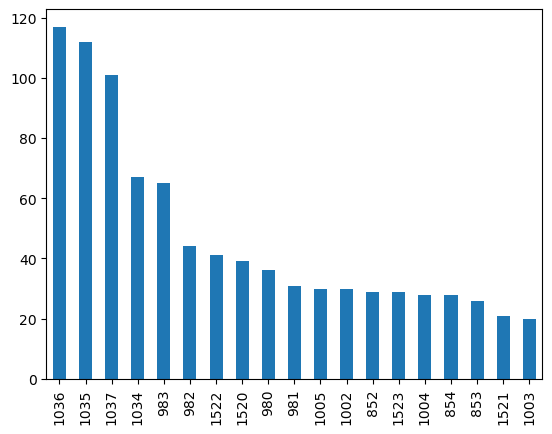

In [43]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar();

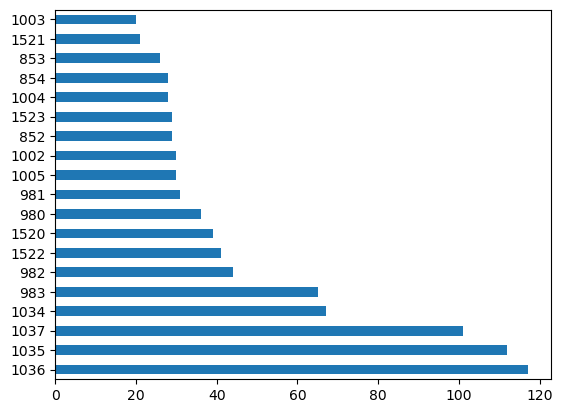

In [44]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh();

Outro gráfico que podemos utilizar é o gráfico de pizza. 

Utilizado para visualizações mais simples onde temos poucas classes diferentes. 

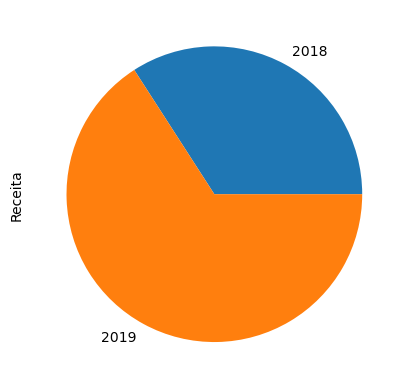

In [45]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie() ;

Como dito, podemos nos aprofundar cada vez mais nas visualizações. 

Para isso, iremos instalar uma nova biblioteca, uma responsável exclusivamente pelas nossas visualizações, que possibilite fazer alterações na configuração do gráfico de modo a tornar a visualização mais intuitiva e informativa:

In [46]:
import matplotlib.pyplot as plt

Para visualizar o que pode ser feito pela biblioteca `matplotlib`, iremos utilizar um exemplo.

Primeiro podemos observar quantas vendas foram realizadas por cidade:

In [47]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

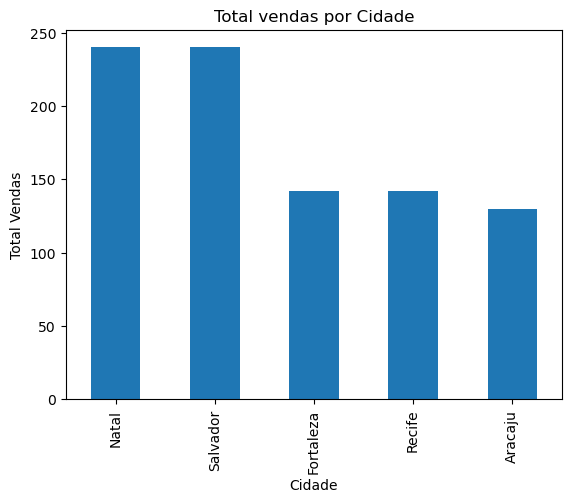

In [48]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

Pudemos, com essa simples linha de código, ascrescentar nomes aos eixos e título ao nosso gráfico.

Além disso, podemos realizar outras visualizações, como por exemplo como as vendas das lojas variam durante os meses do ano, a partir de um gráfico de linhas:

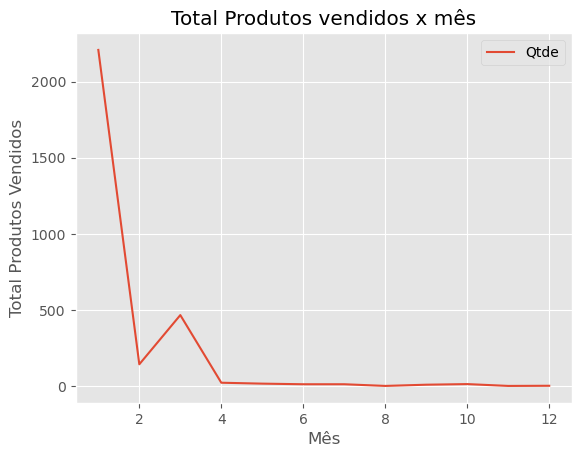

In [49]:
#Alterando o estilo
plt.style.use("ggplot")
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

Ou a partir de um histograma:

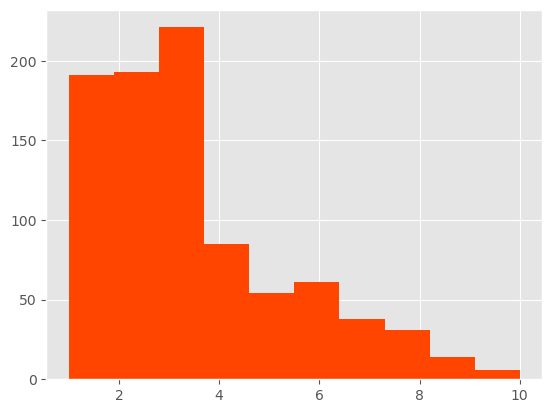

In [50]:
#Hisograma
plt.hist(df["Qtde"], color="orangered");

Ou até mesmo um gráfico de pontos, caso prefira:

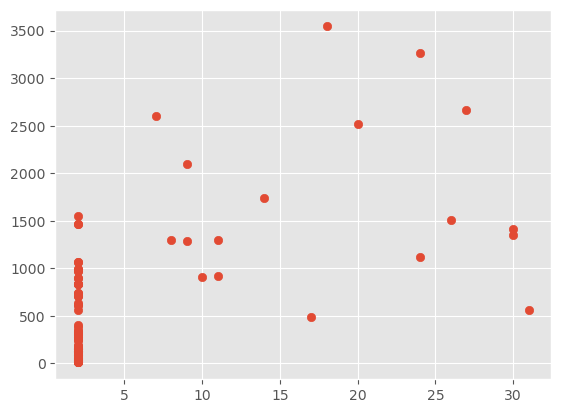

In [52]:
plt.scatter(x=vendas_marco_19 ["dia_venda"], y = vendas_marco_19 ["Receita"]);